In [8]:
import numpy as np
import numpy.random as alea
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
x = np.linspace(0,0.1,100)

y = x*x+(30/0.1-0.1)*x+10

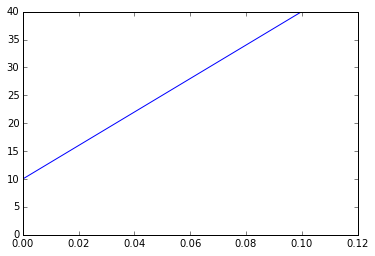

In [7]:
plt.plot(x,y)
plt.plot(x,np.zeros(100))

In [10]:
T = None

In [11]:
T = 7

In [12]:
T

7

In [9]:
(0.02468+0.001739*50)

0.11163000000000001

In [1]:
224*49.0833333

10994.6666592

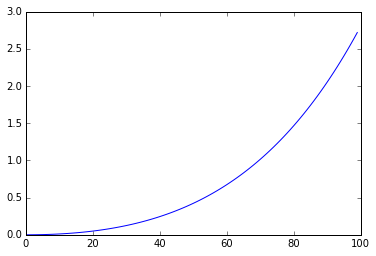

In [369]:
tic = np.linspace(0,100,100)/100*np.linspace(0,100,100)/100*np.exp(np.linspace(0,100,100)/100)
plt.plot(tic)

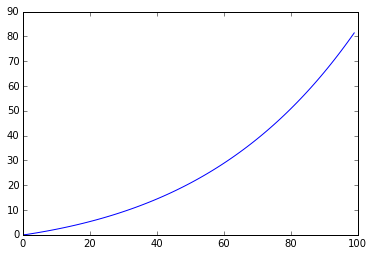

In [372]:
ss

In [121]:
281*40/12.5/60

14.986666666666668

In [139]:
int((alea.randint(0,2)-0.5)*2)

-1

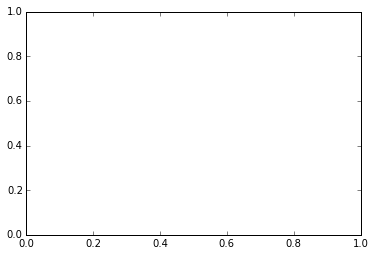

In [325]:
plt.arrow(10, 20, 1, 2)

In [324]:
(2*(alea.binomial(1,0.6,100)-0.5)).astype(int)

array([ 1,  1, -1, -1,  1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1, -1,  1,  1,  1, -1, -1,  1,  1, -1, -1,  1, -1, -1,  1,  1,
       -1,  1,  1, -1,  1, -1,  1, -1, -1, -1, -1, -1,  1,  1, -1,  1, -1,
       -1,  1, -1, -1, -1,  1,  1,  1, -1,  1, -1, -1,  1,  1, -1,  1, -1,
        1,  1,  1,  1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1, -1,  1,  1,  1])

In [313]:
((2*(alea.binomial(1,0.6,10000000)-0.5)).astype(int)).sum()

2001714

In [143]:
6.66666666666667*0.175

1.1666666666666672

In [13]:
x = np.array([0, 7, 14, 21, 28, 52, 59, 64, 71, 74, 78, 85, 99, 106, 120, 127, 133])
y = np.array([123.6, 121.9, 122.7, 122.3, 121.8, 120.9, 120.9, 120.4, 120., 119.5, 119.9, 119.6, 119.2, 119.1, 118.8, 117.7, 116.2])-123.6

In [14]:
alpha = (x*y).sum()/((x**2).sum())

In [15]:
alpha

-0.047851800976800904

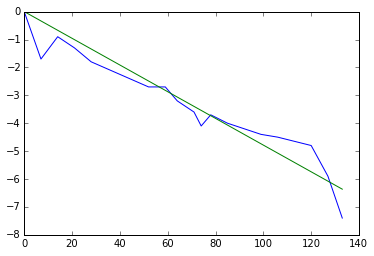

In [16]:
plt.plot(x,y)
plt.plot([0,133],[0,alpha*133])

In [125]:
(0.1-0.03)/40

0.0017500000000000003

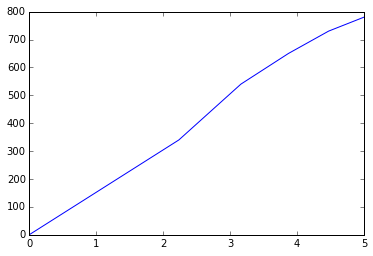

In [36]:
A = np.array([5,10,15,20,25,30,35,40])
T = np.array([0.03,0.039,0.066,0.074,0.1])
PV = np.array([0,340,540,650,730,780])
A2 = np.array([0,5,10,15,20,25])

plt.plot(np.sqrt(A2),PV)

In [33]:
rnd(0,1)

NameError: name 'rnd' is not defined

In [30]:
color

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.11111111,  0.        ,  0.        ],
       [ 0.22222222,  0.        ,  0.        ],
       [ 0.33333333,  0.        ,  0.        ],
       [ 0.44444444,  0.        ,  0.        ],
       [ 0.55555556,  0.        ,  0.        ],
       [ 0.66666667,  0.        ,  0.        ],
       [ 0.77777778,  0.        ,  0.        ],
       [ 0.88888889,  0.        ,  0.        ]])

In [18]:
99.5*1200/60/60*4

132.66666666666666

In [12]:
import pickle
import pandas as pd
record = pd.read_pickle('/home/baptiste/Documents/2017_OptimalPrecision/DataRecording/'+'HarrisWolpertPursuit_dt=0.001_beta=100_m=1'+'.pkl')


In [13]:
record

,position,signal,variance,velocity
0,"[0.0, 0.01455638, 0.05636313, 0.12282701, 0.21...","[30091.2221319, 30091.2221319, 30091.2221319, ...","[0.0, 0.0, 4.52740824697e-07, 2.08713520185e-0...","[0.0, 28.63558393, 54.54613175, 77.99096494, 9..."
100000,"[0.0, 0.0, 0.0307086371251, 0.0890445526368, 0...","[30708.6371251, 30698.142099, 30686.4788418, 3...","[0.0, 0.0, 4.71510197041e-07, 2.17333977548e-0...","[0.0, 30.7086371251, 58.3359155116, 83.1888028..."
200000,"[0.0, 0.0, 0.0316615353506, 0.0918007362518, 0...","[31661.5353506, 31643.8190857, 31624.1289807, ...","[0.0, 0.0, 5.01226410378e-07, 2.31009298463e-0...","[0.0, 31.6615353506, 60.1392009012, 85.7494097..."
300000,"[0.0, 0.0, 0.0322603502958, 0.0935329210669, 0...","[32260.3502958, 32238.2555049, 32213.6972067, ...","[0.0, 0.0, 5.20365100603e-07, 2.39817057218e-0...","[0.0, 32.2603502958, 61.2725707711, 87.3590109..."
400000,"[0.0, 0.0, 0.0326368040232, 0.0946219816944, 0...","[32636.8040232, 32612.0540504, 32584.5429055, ...","[0.0, 0.0, 5.32580488423e-07, 2.4543885979e-06...","[0.0, 32.6368040232, 61.9851776712, 88.3712028..."
500000,"[0.0, 0.0, 0.0328735539134, 0.0953069460663, 0...","[32873.5539134, 32847.1936308, 32817.891208, 3...","[0.0, 0.0, 5.40335273449e-07, 2.49007940186e-0...","[0.0, 32.8735539134, 62.4333921529, 89.0079441..."
600000,"[0.0, 0.0, 0.0330224941667, 0.0957378960785, 0...","[33022.4941667, 32995.1571617, 32964.7679837, ...","[0.0, 0.0, 5.45242560496e-07, 2.51266584145e-0...","[0.0, 33.0224941667, 62.7154019118, 89.4086297..."
700000,"[0.0, 0.0, 0.0331162205497, 0.096009110106, 0....","[33116.2205497, 33088.2910615, 33057.2424914, ...","[0.0, 0.0, 5.48342031749e-07, 2.5269322373e-06...","[0.0, 33.1162205497, 62.8928895563, 89.6608430..."
800000,"[0.0, 0.0, 0.033175216307, 0.0961798383678, 0....","[33175.216307, 33146.9273846, 33115.4786907, 3...","[0.0, 0.0, 5.50297488507e-07, 2.53593333103e-0...","[0.0, 33.175216307, 63.0046220608, 89.81963854..."
900000,"[0.0, 0.0, 0.0332123586032, 0.0962873329575, 0...","[33212.3586032, 33183.8516114, 33152.1601014, ...","[0.0, 0.0, 5.51530381995e-07, 2.54160868289e-0...","[0.0, 33.2123586032, 63.0749743543, 89.9196370..."
